<a href="https://colab.research.google.com/github/joseph-karadakis/Project_4/blob/main/AMD_XCG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout
import tensorflow as tf


In [3]:
# Read the csv file and clean the data
stock_data = pd.read_csv('Resources/data.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')
price_columns = ['Close/Last', 'Open', 'High', 'Low']
for column in price_columns:
    stock_data[column] = stock_data[column].str.replace('$', '').astype(float)
amd_data = stock_data[stock_data['Company'] == 'AMD']
amd_data =amd_data.sort_values(by="Date")
amd_data.head()

<ipython-input-3-61d39defc5a4>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  stock_data[column] = stock_data[column].str.replace('$', '').astype(float)


,Company,Date,Close/Last,Volume,Open,High,Low
22643,AMD,2013-07-18,4.64,69380920,4.380,4.65,4.370
22642,AMD,2013-07-19,4.03,151446600,3.990,4.08,3.850
22641,AMD,2013-07-22,3.90,49758410,4.005,4.01,3.885
22640,AMD,2013-07-23,3.66,76717500,3.880,3.88,3.640
22639,AMD,2013-07-24,3.63,50766260,3.690,3.75,3.580


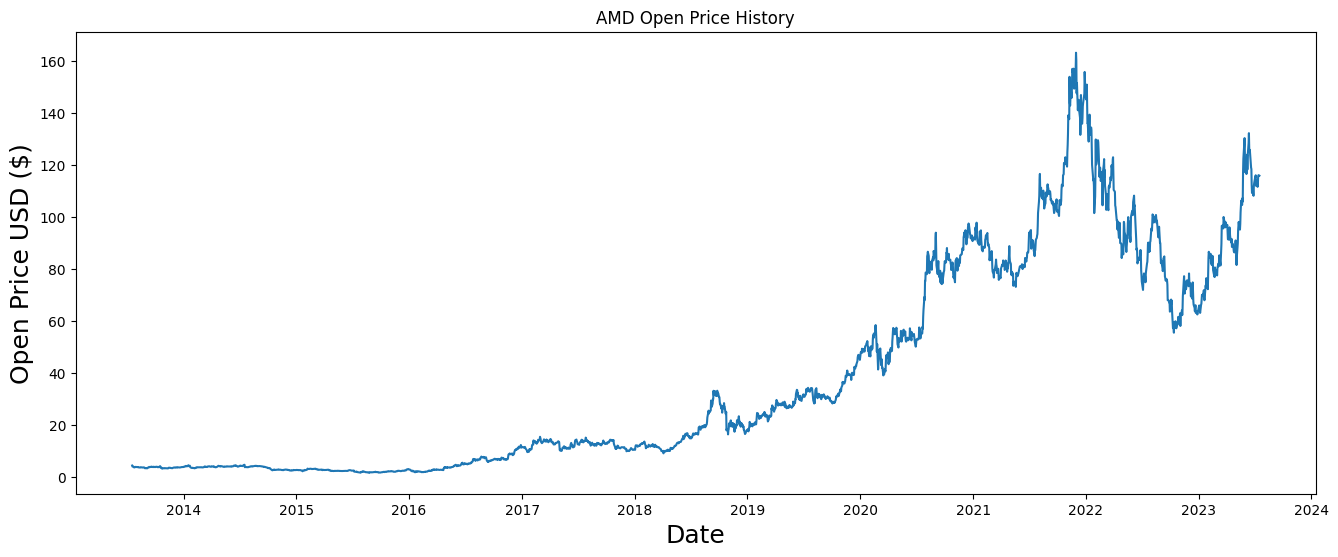

In [6]:
# Plotting the close price history
plt.figure(figsize=(16,6))
plt.title('AMD Open Price History')
plt.plot(amd_data['Date'], amd_data['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.show()

In [8]:
amd_data.isna().any()

Company       False
Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

In [9]:
amd_data.tail(10)

,Company,Date,Close/Last,Volume,Open,High,Low
20137,AMD,2023-07-03,115.82,31780660,115.16,116.7300,114.5100
20136,AMD,2023-07-05,113.95,49501580,116.10,117.6620,113.8550
20135,AMD,2023-07-06,113.48,42411840,112.07,113.7900,110.3100
20134,AMD,2023-07-07,113.17,37211290,114.16,115.3300,113.0400
20133,AMD,2023-07-10,113.58,49330200,113.00,113.6100,109.8800
20132,AMD,2023-07-11,111.32,59899540,111.66,113.2700,109.5000
20131,AMD,2023-07-12,114.58,57993090,112.89,115.3999,112.3101
20130,AMD,2023-07-13,115.92,49206700,115.76,116.1600,113.5750
20129,AMD,2023-07-14,115.94,91927200,116.17,122.1200,115.2500
20128,AMD,2023-07-17,118.32,68593290,115.95,118.8399,112.7300


In [10]:
amd_data.describe()

,Close/Last,Volume,Open,High,Low
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000
mean,38.069080,5.341410e+07,38.067611,38.857642,37.251372
std,39.991063,3.790139e+07,40.006701,40.834076,39.122481
min,1.620000,2.606577e+06,1.620000,1.690000,1.610000
25%,4.037500,2.574506e+07,4.030000,4.100000,3.980000
50%,16.595000,4.653384e+07,16.635000,16.880000,16.245000
75%,76.587500,7.237718e+07,76.735000,78.064925,74.977500
max,161.910000,3.238445e+08,163.280000,164.459900,156.100000


In [12]:
amd_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 22643 to 20128
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Company     2516 non-null   object        
 1   Date        2516 non-null   datetime64[ns]
 2   Close/Last  2516 non-null   float64       
 3   Volume      2516 non-null   int64         
 4   Open        2516 non-null   float64       
 5   High        2516 non-null   float64       
 6   Low         2516 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 157.2+ KB


In [13]:
amd_data.isnull().sum()

Company       0
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [14]:
# Split training and testing datasets

df_test = amd_data.tail(40)
amd_df = amd_data.iloc[::-1]

In [16]:
#Mean

amd_df['Open'].mean()

38.0676110890302

In [17]:
import seaborn as sb
features = ['Open', 'High', 'Low', 'Close/Last', 'Volume']

<ipython-input-18-6c6dccffeec5>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
<ipython-input-18-6c6dccffeec5>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(amd_data[col])
<ipython-input-18-6c6dccffeec5>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use t

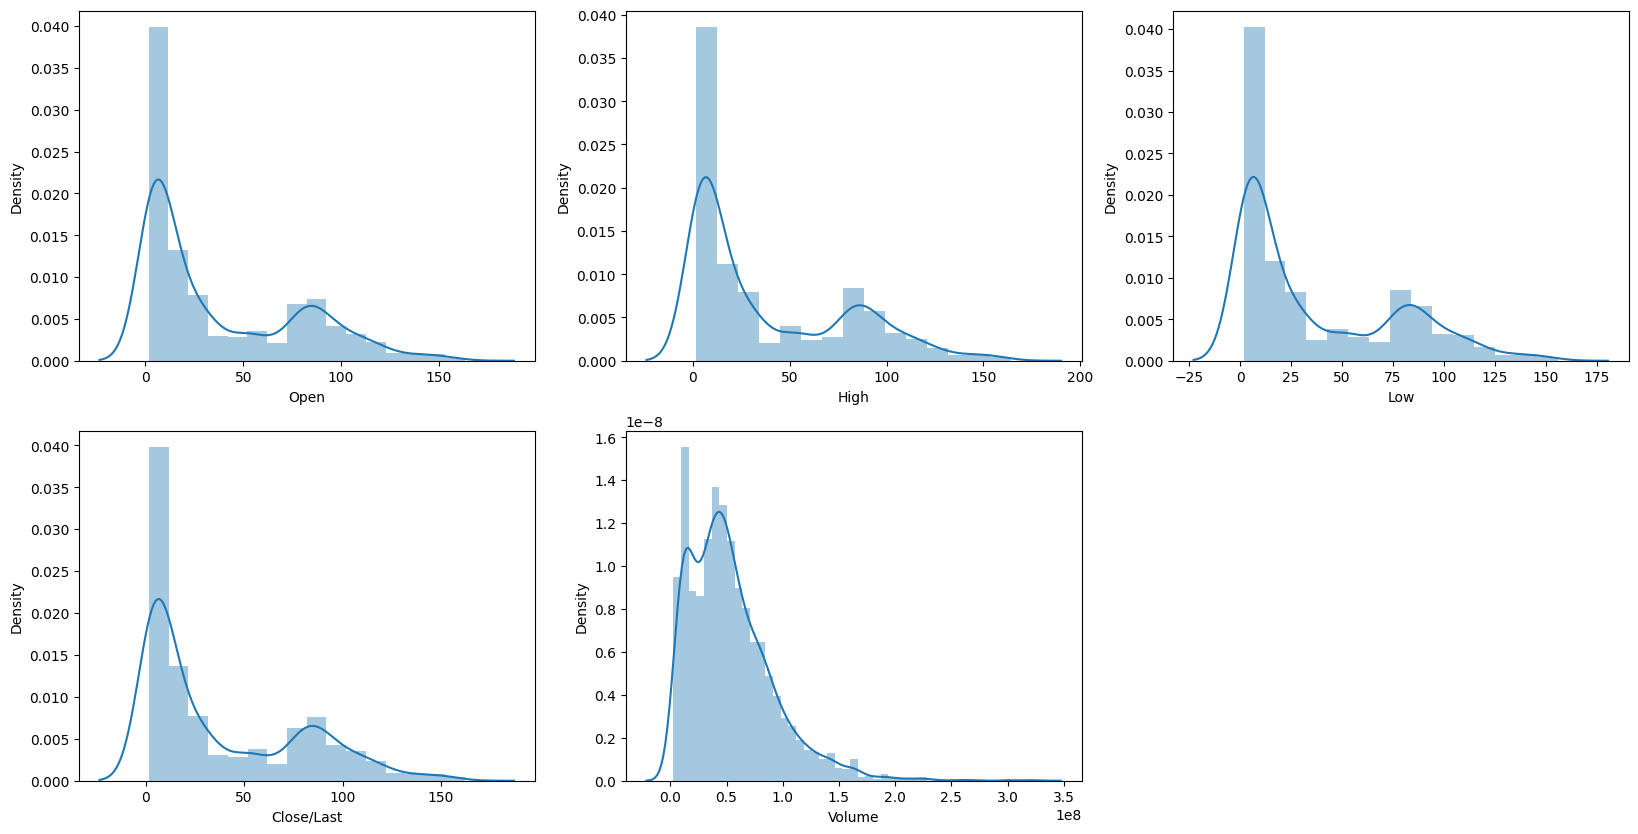

In [18]:
plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(amd_data[col])
plt.show()

In [19]:
amd_data.describe()

,Close/Last,Volume,Open,High,Low
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000
mean,38.069080,5.341410e+07,38.067611,38.857642,37.251372
std,39.991063,3.790139e+07,40.006701,40.834076,39.122481
min,1.620000,2.606577e+06,1.620000,1.690000,1.610000
25%,4.037500,2.574506e+07,4.030000,4.100000,3.980000
50%,16.595000,4.653384e+07,16.635000,16.880000,16.245000
75%,76.587500,7.237718e+07,76.735000,78.064925,74.977500
max,161.910000,3.238445e+08,163.280000,164.459900,156.100000


<ipython-input-22-e460a587ff53>:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = amd_data.groupby('year').mean()
<ipython-input-22-e460a587ff53>:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


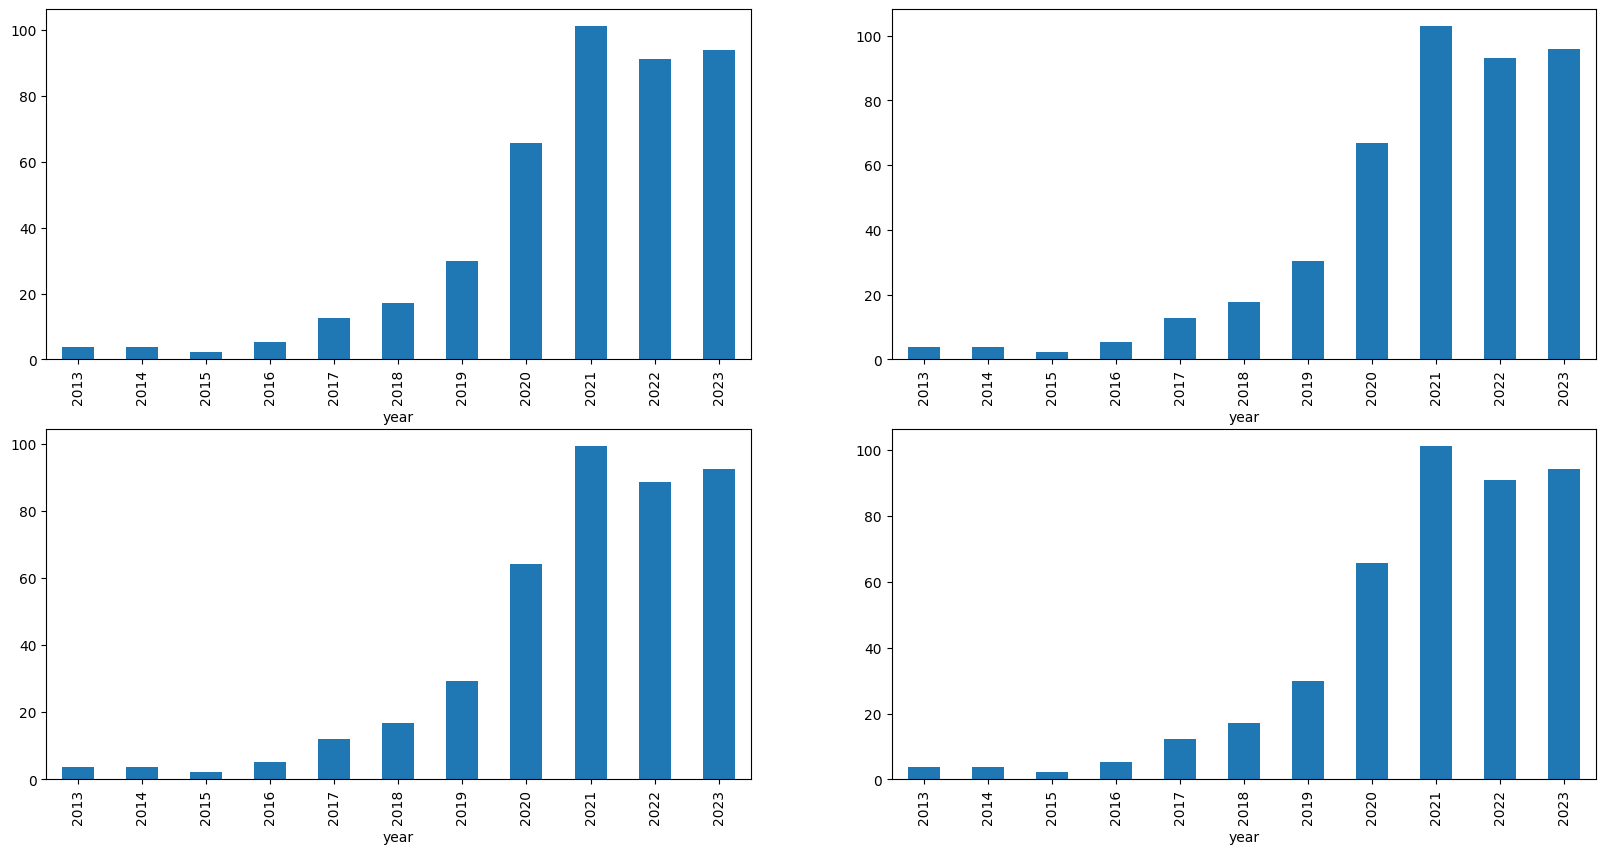

<ipython-input-22-e460a587ff53>:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  amd_data.groupby('is_quarter_end').mean()
<ipython-input-22-e460a587ff53>:44: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(amd_data.corr() > 0.9, annot=True, cbar=False)


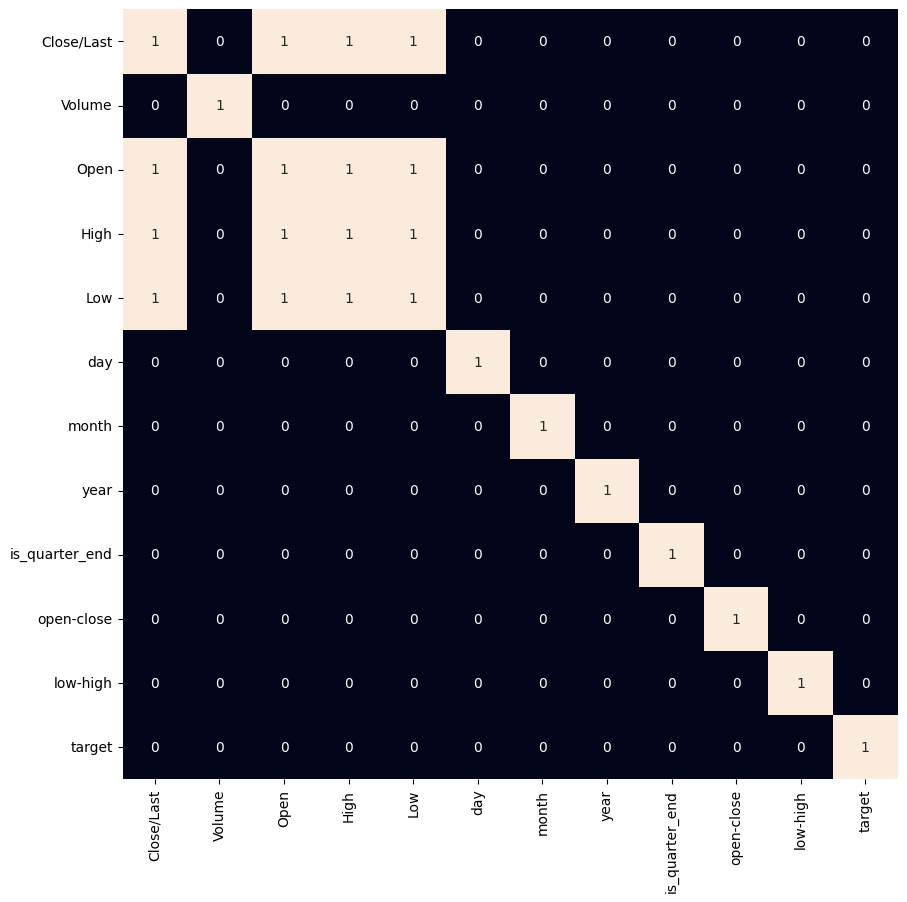

(2264, 3) (252, 3)
LogisticRegression() : 
Training Accuracy :  0.5123858688017979
Validation Accuracy :  0.5599015834963094

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4842666729097408
Validation Accuracy :  0.43249637246861394

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...

In [22]:


# split
amd_data["Date"] = amd_data["Date"].astype(str)
splitted = amd_data['Date'].str.split('-', expand=True)

amd_data['day'] = splitted[2].astype('int')
amd_data['month'] = splitted[1].astype('int')
amd_data['year'] = splitted[0].astype('int')

amd_data.head()

# tail
amd_data.tail(5)

# null
amd_data.isnull().sum()

# quarters
amd_data['is_quarter_end'] = np.where(amd_data['month']%3==0,1,0)
amd_data.head()

#group
data_grouped = amd_data.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close/Last']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

# groupby
amd_data.groupby('is_quarter_end').mean()


amd_data['open-close']  = amd_data['Open'] - amd_data['Close/Last']
amd_data['low-high']  = amd_data['Low'] - amd_data['High']
amd_data['target'] = np.where(amd_data['Close/Last'].shift(-1) > amd_data['Close/Last'], 1, 0)


plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(amd_data.corr() > 0.9, annot=True, cbar=False)
plt.show()

#
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
features = amd_data[['open-close', 'low-high', 'is_quarter_end']]
target = amd_data['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

#
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC

#
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

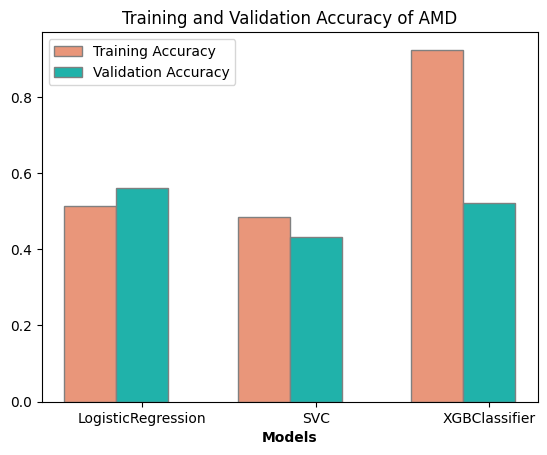

In [25]:
# Model names
models_name = ['LogisticRegression', 'SVC', 'XGBClassifier']

# Training accuracy values
train_acc = [0.5123858688017979, 0.4842666729097408, 0.9235586302695447]

# Validation accuracy values
val_acc = [0.5599015834963094, 0.43249637246861394, 0.5212920320484512]

# Bar width
barWidth = 0.3

# Set position of bar on X axis
r1 = np.arange(len(train_acc))
r2 = [x + barWidth for x in r1]

# Create blue bars for training accuracy
plt.bar(r1, train_acc, color='darksalmon', width=barWidth, edgecolor='grey', label='Training Accuracy')

# Create red bars for validation accuracy
plt.bar(r2, val_acc, color='lightseagreen', width=barWidth, edgecolor='grey', label='Validation Accuracy')

# Title & Subtitle
plt.title('Training and Validation Accuracy of AMD')
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(train_acc))], models_name)

# Create legend & Show graphic
plt.legend()
plt.show()